# **Phân tích nhu cầu khách hàng với PCA**

**Cài đặt thư viện**

In [ ]:
import numpy as np 
import pandas as pd 

**Kiểm tra các tập dữ liệu**

Nhập dữ liệu orders

In [ ]:
orders = pd.read_csv('./drive/MyDrive/data/orders.csv')
print(orders.head())

   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]


Nhập dữ liệu prior

In [ ]:
prior = pd.read_csv('./drive/MyDrive/data/order_products__prior.csv')
print(prior.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


Nhập dữ liệu order train

In [ ]:
train = pd.read_csv('./drive/MyDrive/data/order_products__train.csv')
print(train.head())

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


Từ dataset ta có thể hiểu được
*  Người dùng được xác định user_id trong tệp csv đơn đặt hàng. Mỗi một hàng trong file orders.csv đại diện cho một đơn đặt hàng do người dùng thực hiện. Đơn hàng được xác định bởi order_id 
*  Mỗi đơn đặt hàng của người dùng được xác định bởi order_number tại thời điểm nó được thực hiện 
* Mỗi đơn đặt hàng bao gồm một tập hợp sản phẩm, mỗi sản phẩm được đặc trưng bởi một tính năng add_to_cart_order biểu thị trình tự mà chúng đã được thêm vào giỏ hàng theo thứ tự đó


In [ ]:
prior = prior[0:300000] #giảm số lượng hàng
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
print(order_prior.head())

        order_id  product_id  ...  order_hour_of_day  days_since_prior_order
221645     23391       13198  ...                 10                    28.0
221646     23391       42803  ...                 10                    28.0
221647     23391        8277  ...                 10                    28.0
221648     23391       37602  ...                 10                    28.0
221649     23391       40852  ...                 10                    28.0

[5 rows x 10 columns]


In [ ]:
products = pd.read_csv('./drive/MyDrive/data/products.csv')
print(products.head())

   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]


In [ ]:
aisles = pd.read_csv('./drive/MyDrive/data/aisles.csv')
print(aisles.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [ ]:
print(aisles.shape)

(134, 2)


In [ ]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
print(mt.head(10))

   order_id  product_id  ...  days_since_prior_order  aisle
0         2       33120  ...                     8.0   eggs
1        26       33120  ...                     7.0   eggs
2       120       33120  ...                    10.0   eggs
3       327       33120  ...                     8.0   eggs
4       390       33120  ...                     9.0   eggs
5       537       33120  ...                     3.0   eggs
6       582       33120  ...                    10.0   eggs
7       608       33120  ...                    12.0   eggs
8       623       33120  ...                     3.0   eggs
9       689       33120  ...                     3.0   eggs

[10 rows x 14 columns]


In [ ]:
print(mt['product_name'].value_counts()[0:20])

Banana                      4432
Bag of Organic Bananas      3563
Organic Strawberries        2370
Organic Baby Spinach        2242
Organic Hass Avocado        1985
Organic Avocado             1626
Large Lemon                 1380
Strawberries                1343
Organic Raspberries         1293
Limes                       1270
Organic Whole Milk          1231
Organic Garlic              1011
Organic Yellow Onion        1007
Cucumber Kirby               927
Organic Blueberries          910
Organic Zucchini             906
Organic Lemon                855
Organic Fuji Apple           827
Apple Honeycrisp Organic     791
Honeycrisp Apple             779
Name: product_name, dtype: int64


In [ ]:
len(mt['product_name'].unique())

prior.shape

len(mt['aisle'].unique())

print(mt['aisle'].value_counts()[0:10])

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64


Bài toán được đặt ra ở đây là phải tìm một cụm các khách hàng khác nhau và thay thế  user_id đơn lẻ bằng cụm mà nó thuộc về để làm tăng hiệu xuất của mô hình dự đoán .


**Bước 1**: Tạo khung dữ liệu với tất cả các giao dịch mua của mỗi người dùng


In [ ]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
print(cust_prod.head(10))


aisle    air fresheners candles  asian foods  ...  white wines  yogurt
user_id                                       ...                     
7                             0            0  ...            0       0
13                            0            0  ...            0       0
23                            0            0  ...            0       4
27                            0            0  ...            0       4
36                            0            0  ...            0       0
42                            0            0  ...            0       0
66                            0            0  ...            0       0
67                            0            0  ...            0       0
70                            0            0  ...            0       1
71                            0            0  ...            0       3

[10 rows x 134 columns]


Khung dữ liệu:

In [ ]:
print(cust_prod.shape)

(25831, 134)


**Bước 2**: Phân tích thành phần chính đối với khung dữ liệu thu được đê giảm số lượng tính năng từ số lượng aisles xuống còn 6

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

ps = pd.DataFrame(pca_samples)
print(ps.head())

          0         1         2         3         4         5
0 -0.286251  1.005868 -1.030292 -0.898971 -0.587632 -0.998686
1 -1.972748 -0.487659 -0.120542  0.213092  0.045992 -0.181759
2 -1.168974  1.284089  3.228124  0.594051 -0.648828 -1.091853
3 -1.433967  1.250081  3.261985  1.237745 -0.353588 -0.346425
4 -2.070709 -0.422148 -0.101552  0.278102  0.006026 -0.097297


Sau khi thử qua 1 số cặp từ 6 thành phần trên, chọn cặp 1 và 4 để tiếp tục thực hiện.

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())


(25831, 2)
          4         1
0 -0.587632  1.005868
1  0.045992 -0.487659
2 -0.648828  1.284089
3 -0.353588  1.250081
4  0.006026 -0.422148


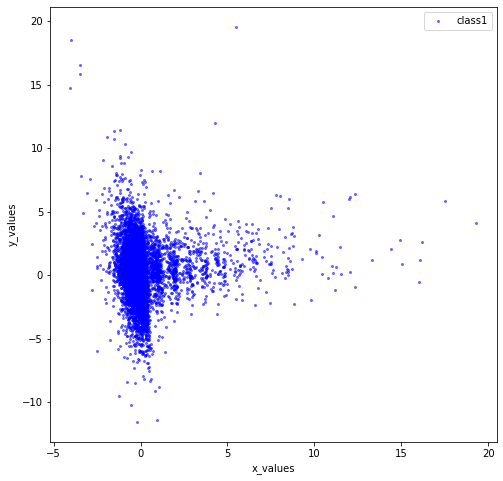

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])

['purple', 'blue', 'purple', 'purple', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


<Figure size 576x576 with 0 Axes>

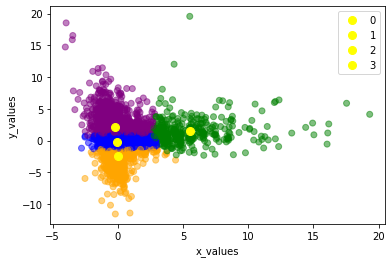

In [ ]:
plt.scatter(tocluster[4],tocluster[1],  color = colored,alpha=0.5)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color = "yellow", alpha=1, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

Theo như biểu đồ thì ta có thể nhìn thấy được ở đây người dân được chia theo 4 cụm. và bây giờ chúng ta sẽ phân tích từng cụm theo biểu đồ cột.

In [ ]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds
clust_prod.head(10)
print (clust_prod.shape)

(25831, 135)


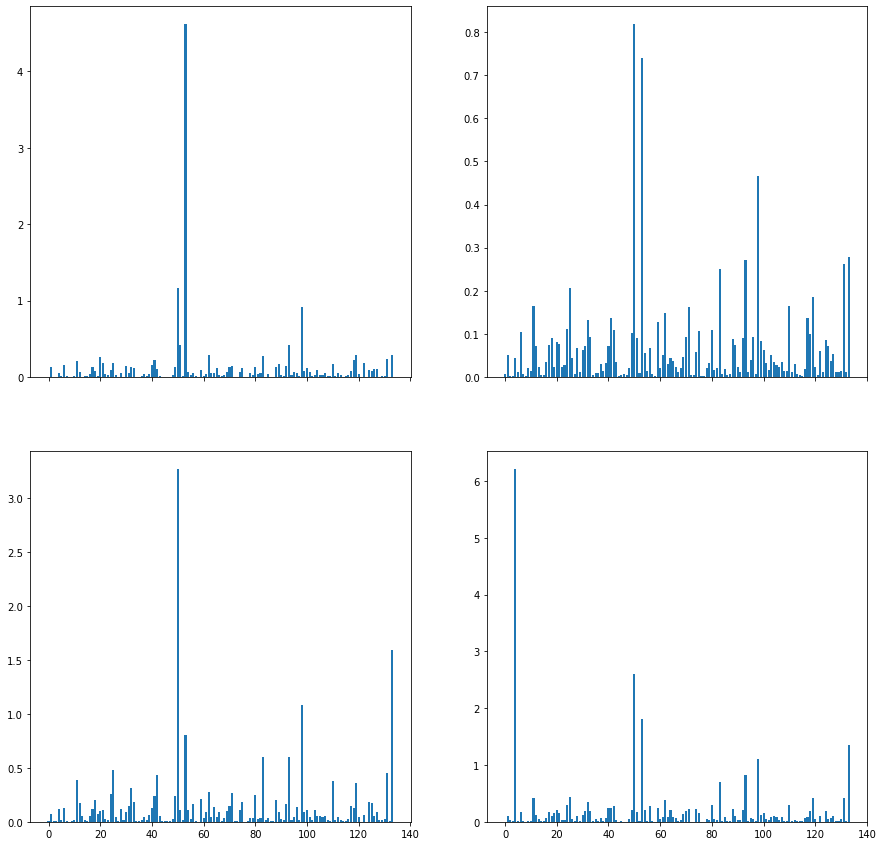

In [ ]:
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)

c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)

c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)

c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)

plt.show()

Thông qua biểu đồ trên chúng ta có thể thấy được những loại thực phẩm mà người dân theo từng cụm mua nhiều hay ít.
Để có cái nhìn tốt hơn thì chúng ta sẽ xem xem Top loại thực phẩm mà người dân mua theo từng cụm.


In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])

HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,1.163216,4.620428,0.922015,0.287095,0.423395,0.279848,0.242581,0.188061
1,0.818765,0.739032,0.465411,0.278152,0.271190,0.249641,0.262847,0.205824
2,3.268080,0.802455,1.078795,1.592411,0.603571,0.597768,0.452009,0.481696
3,2.605634,1.814085,1.101408,1.343662,0.828169,0.695775,0.419718,0.430986


In [ ]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              4.620428
fresh fruits                  1.163216
packaged vegetables fruits    0.922015
packaged cheese               0.423395
fresh herbs                   0.421670
soy lactosefree               0.288475
yogurt                        0.287095
frozen produce                0.282264
milk                          0.279848
canned jarred vegetables      0.261560
dtype: float64

In [ ]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.818765
fresh vegetables                 0.739032
packaged vegetables fruits       0.465411
yogurt                           0.278152
packaged cheese                  0.271190
water seltzer sparkling water    0.262847
milk                             0.249641
chips pretzels                   0.205824
soy lactosefree                  0.185766
refrigerated                     0.164825
dtype: float64

In [ ]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     3.268080
yogurt                           1.592411
packaged vegetables fruits       1.078795
fresh vegetables                 0.802455
packaged cheese                  0.603571
milk                             0.597768
chips pretzels                   0.481696
water seltzer sparkling water    0.452009
energy granola bars              0.432812
bread                            0.383705
dtype: float64

In [ ]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula                6.214085
fresh fruits                     2.605634
fresh vegetables                 1.814085
yogurt                           1.343662
packaged vegetables fruits       1.101408
packaged cheese                  0.828169
milk                             0.695775
chips pretzels                   0.430986
water seltzer sparkling water    0.419718
soy lactosefree                  0.419718
dtype: float64

Bảng sau đây mô tả tỷ lệ phần trăm hàng hóa này so với 8 mặt hàng hàng đầu khác trong mỗi cụm. Có thể dễ dàng nhận ra một số khác biệt thú vị giữa các cụm.

In [ ]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,14.313617,56.855335,11.345590,3.532759,5.209970,3.443591,2.985011,2.314127
1,24.879949,22.457101,14.142517,8.452265,8.240707,7.585883,7.987172,6.254407
2,36.816033,9.039932,12.152987,17.939046,6.799437,6.734058,5.092034,5.426474
3,28.201220,19.634146,11.920732,14.542683,8.963415,7.530488,4.542683,4.664634


Một số nhận xét có thể rút ra được sau khi quan sát bảng tính theo phần trăm:

Người dân cụm 0 và 1 mua nhiều rau sạch hơn các cụm khác. Được hiển thị bằng dữ liệu tuyệt đối, Cụm 0 cũng là cụm bao gồm những khách hàng mua nhiều hàng hóa hơn bất kỳ nhóm nào khác.

Người dân cụm 2 mua yogur nhiều hơn người dân cụm còn lại.

Những người thuộc cụm 3 mua rất nhiều Baby Food Formula thậm chí không được liệt kê trong 8 sản phẩm hàng đầu nhưng chủ yếu mô tả đặc điểm của cụm này. với quan sát này, họ mua nhiều sữa hơn những người khác.
